# Query for Spectraction Results in NON OGA

 work with Weakly_2022_39
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/10/31
- update : 2022/11/01


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2022_39/atmospec 	setup
drp_pipe              LOCAL:/home/d/dagoret/repos/repos_w_2022_39/drp_pipe 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/eups 	setup
summit_utils          LOCAL:/home/d/dagoret/repos/repos_w_2022_39/summit_utils 	setup


In [2]:
! eups list -s lsst_distrib

   g0b29ad24fb+a10408d0bf 	current w_2022_39 setup


In [3]:
import lsst.daf.butler as dafButler
import lsst.summit.utils.butlerUtils as butlerUtils

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
import pickle

In [6]:
from astropy.time import Time
import astropy.units as u

## Config

### Butler

In [7]:
repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser

In [8]:
# path index for each month
#DATE="20211103"
DATE="20220630"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
#filterdispersername = "FELH0600~holo4_003"

### Spectractor

In [9]:
configmode = "PSF2DFFM"

### The collection

In [10]:
#my_collection = "u/dagoret/spectro/noflat/empty~holo4/20211103"
my_collection = "u/dagoret/spectro/noflat/empty~holo4/"+str(DATE)
datasetRefs = registry.queryDatasets(datasetType='spectraction', collections=my_collection, where= "instrument='LATISS'")

In [11]:
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

## Loop on exposures

In [12]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers



for i, ref in enumerate(datasetRefs):

    print("========================datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
    # retrieve the spectrum from Butler
    #spec       = butler.get('spectraction',the_dataId)
    spec = butler.get('spectraction', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    if i > 15:
        break

========================datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022063000045}
visit...................: 2022063000045
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20220630/20221031T232801Z
{'day_obs': 20220630, 'seq_num': 45, 'detector': 0}
========================datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022063000046}
visit...................: 2022063000046
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/spectro/noflat/empty~holo4/20220630/20221031T233517Z
{'day_obs': 20220630, 'seq_num': 46, 'detector': 0}
========================data

## Plot

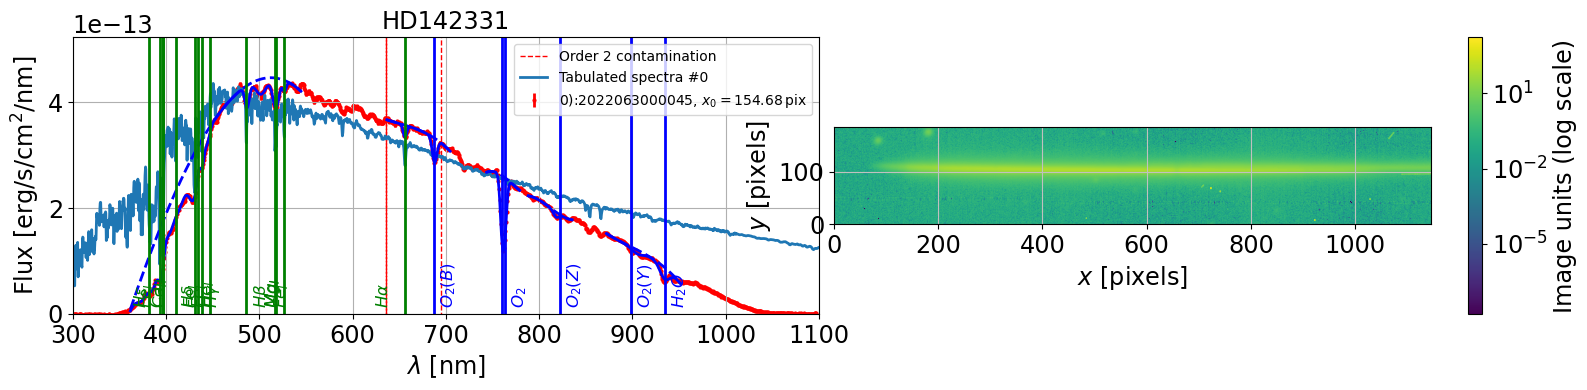

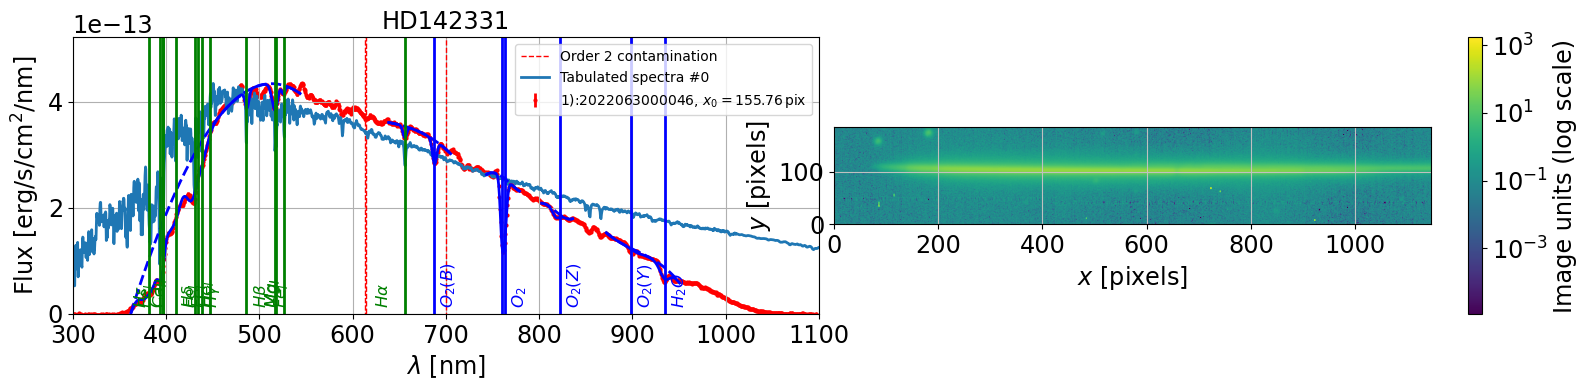

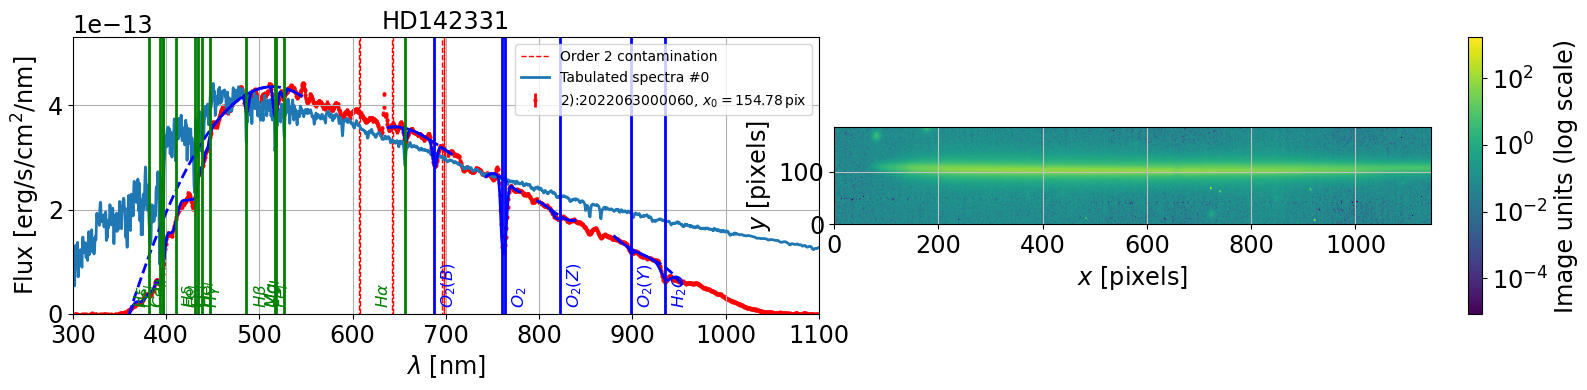

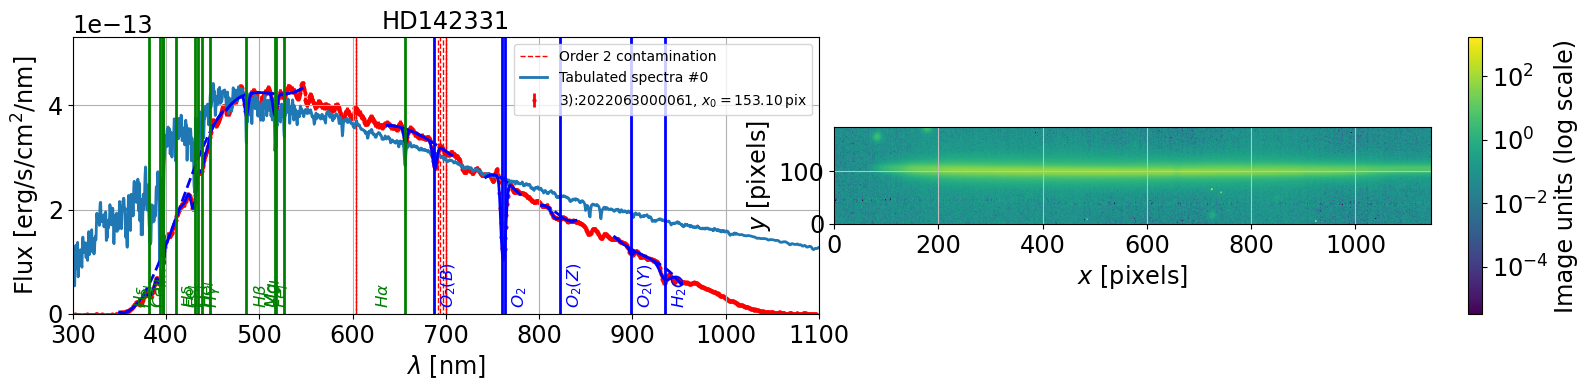

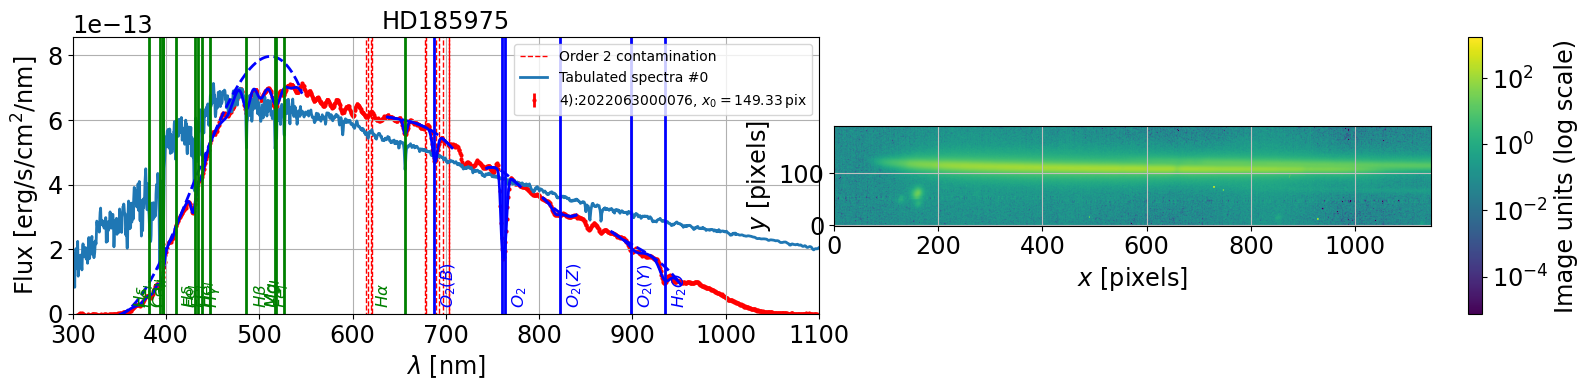

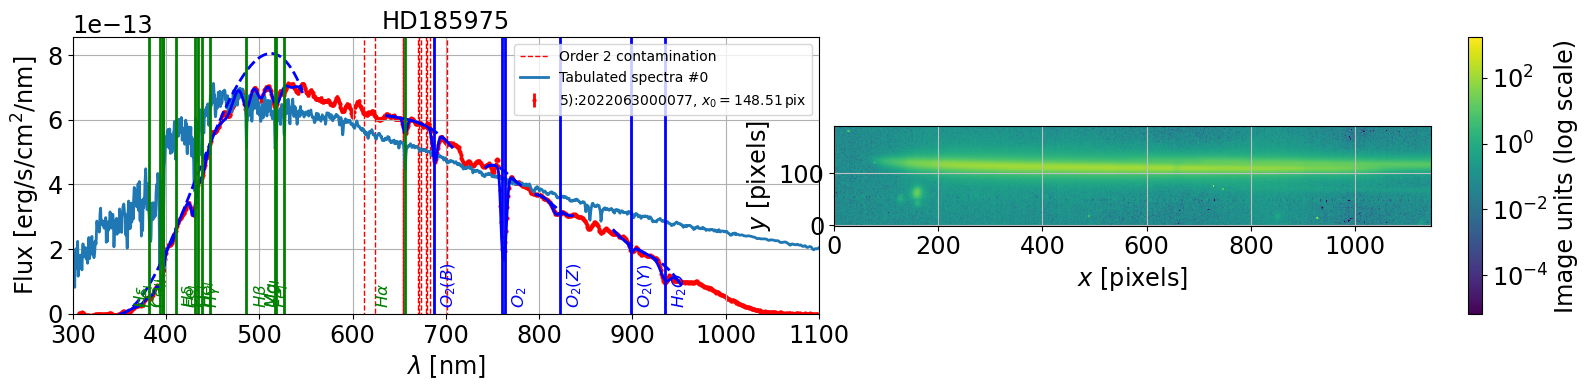

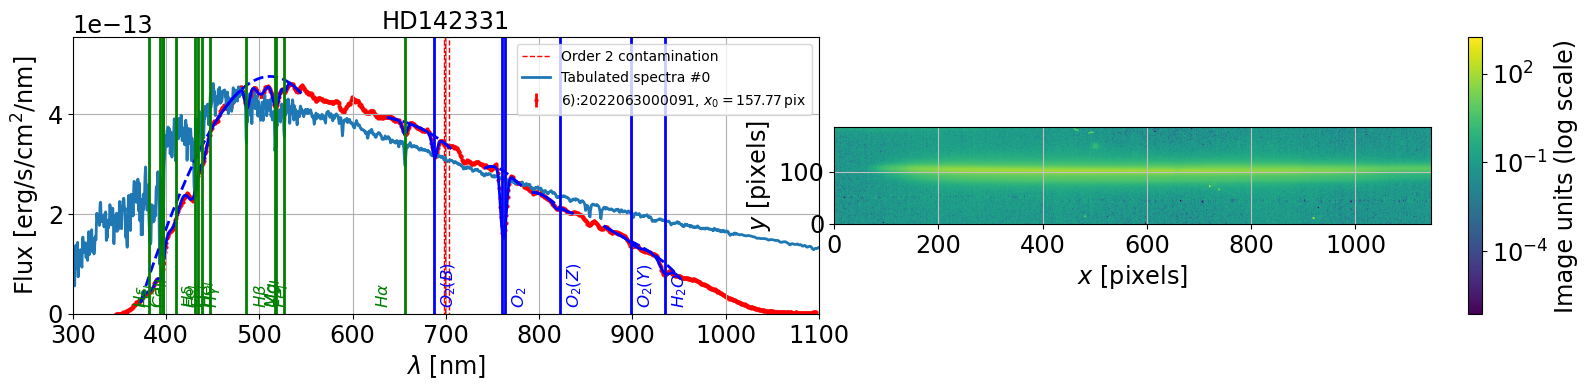

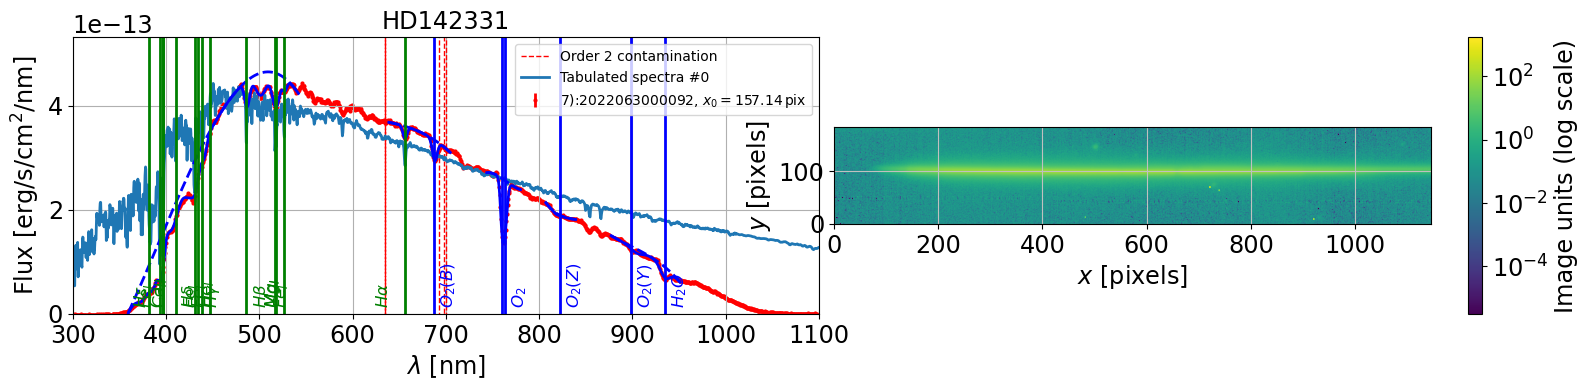

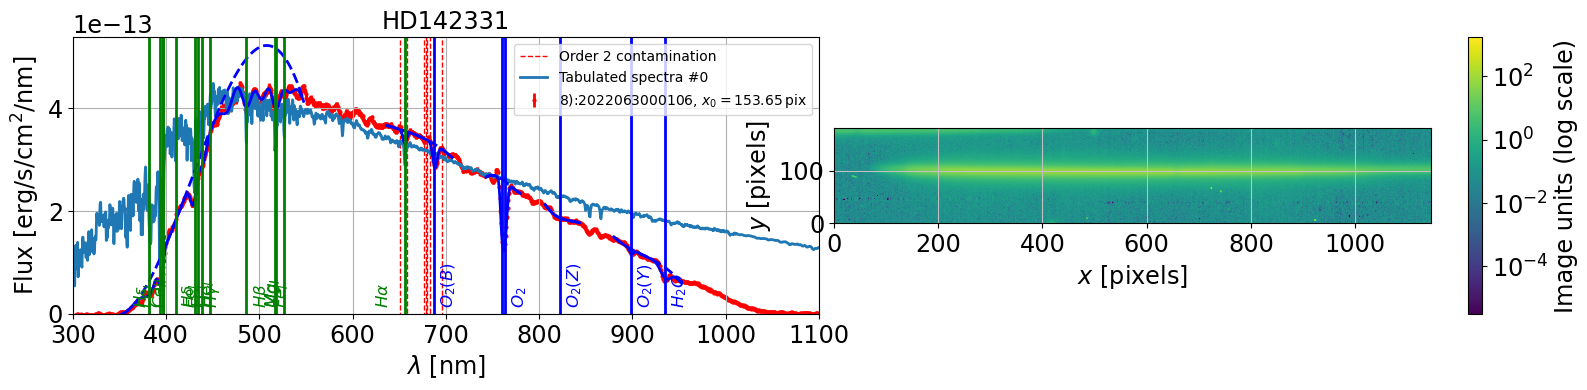

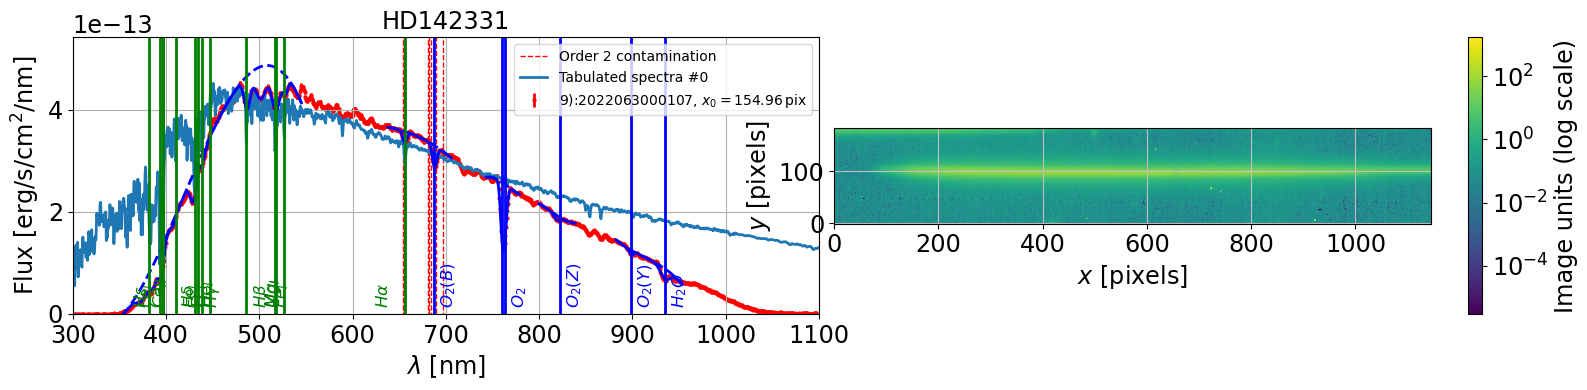

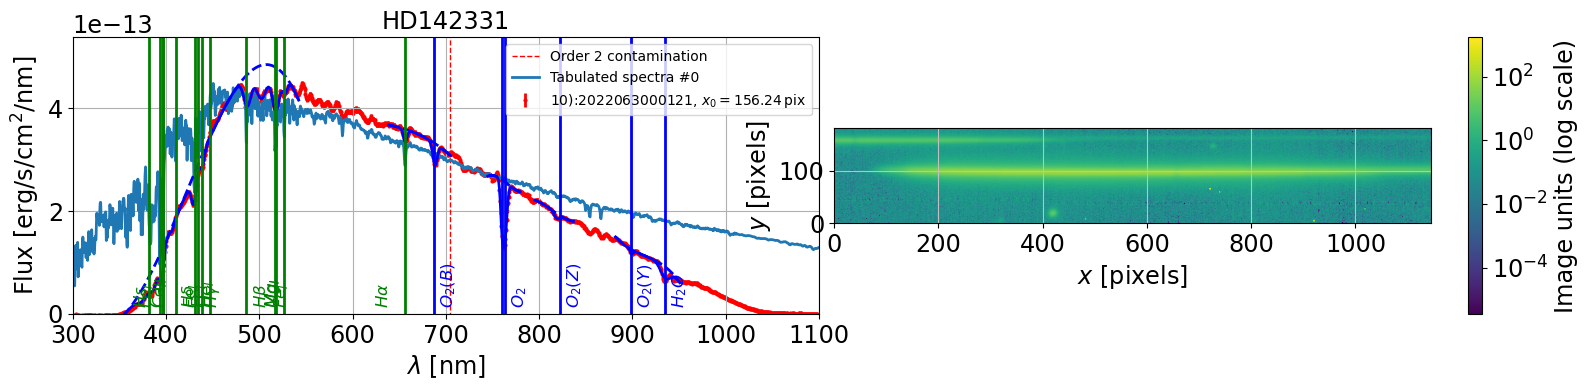

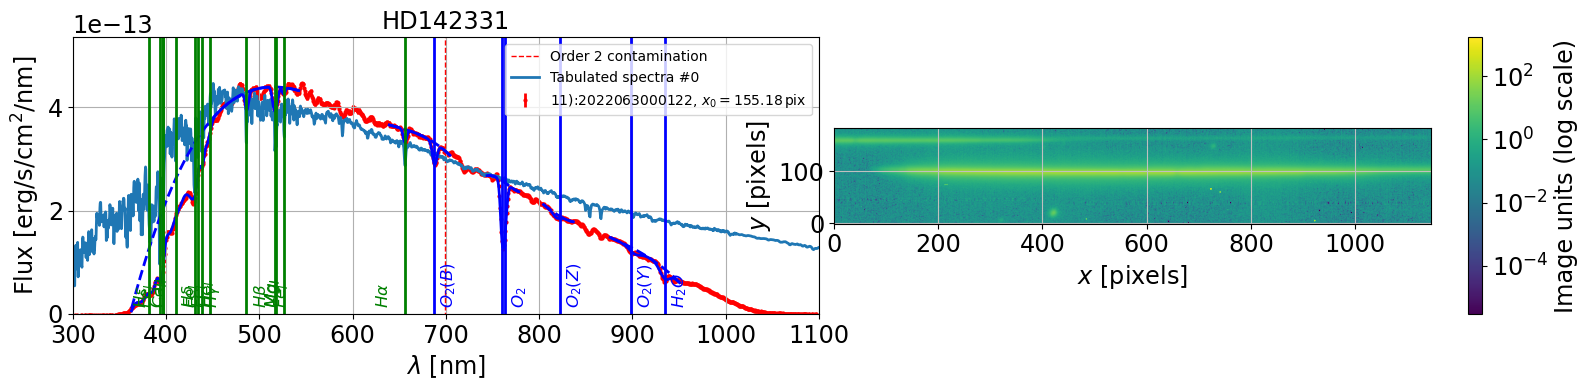

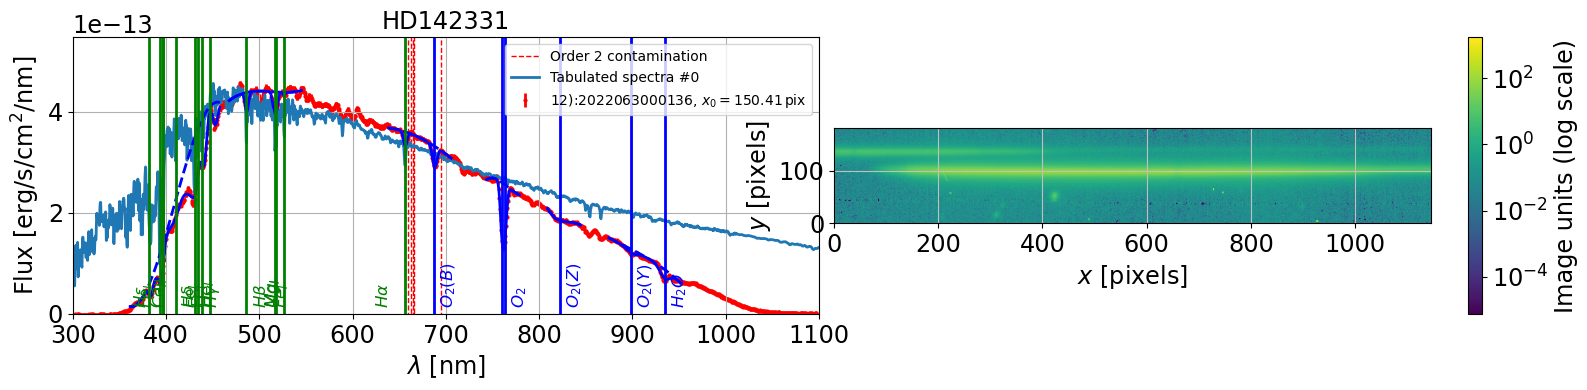

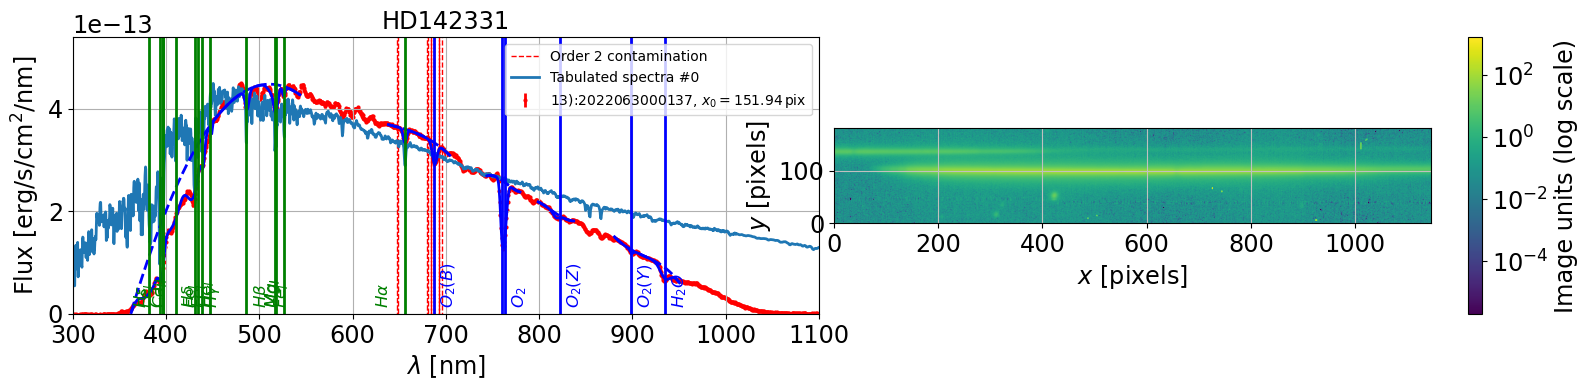

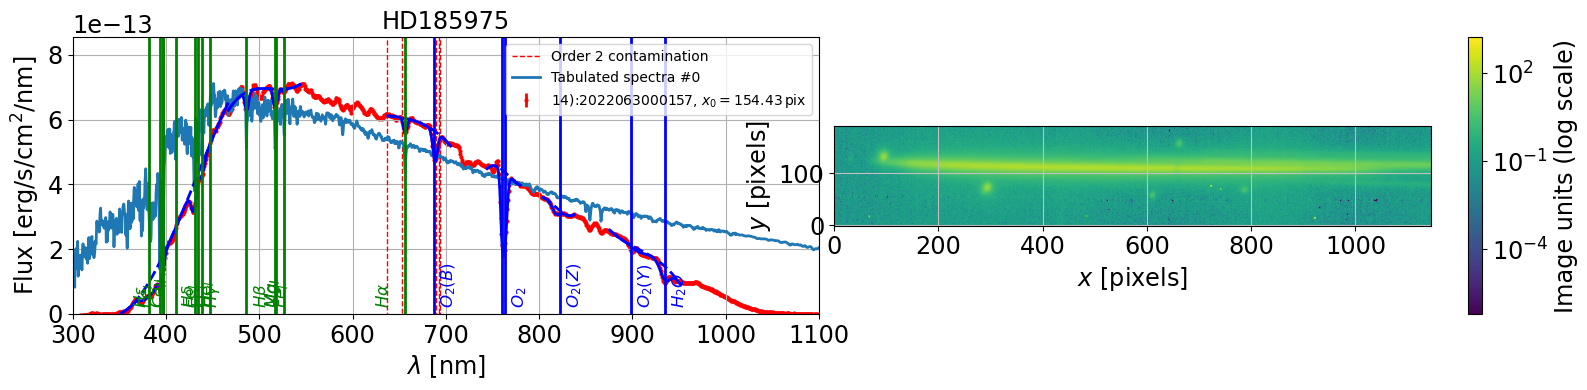

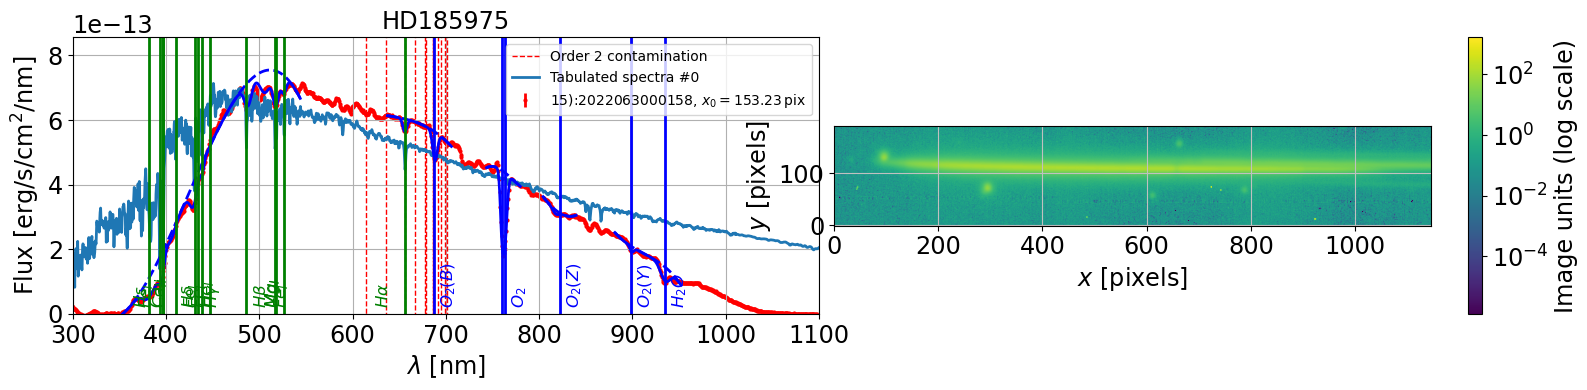

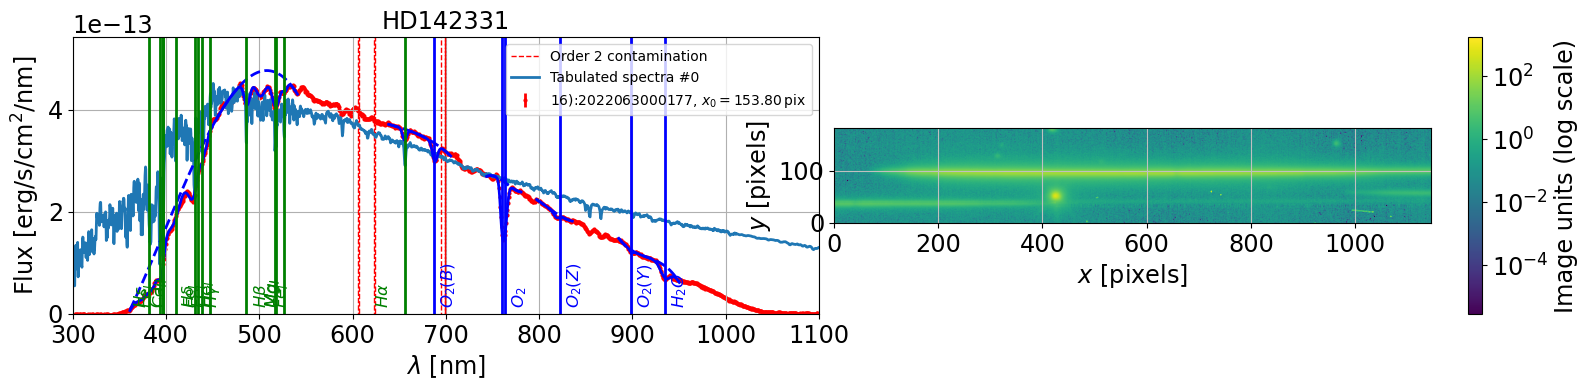

In [13]:
FLAG_ORDER2 = True

infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]


idx=0
for spec in all_spec:
    
    fig=plt.figure(figsize=(16,4))
    
    s=spec.spectrum
    label = str(idx) +"):" + str(all_exposures[idx])
    
    ax1 = fig.add_subplot(1, 2, 1)
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    ax2 = fig.add_subplot(1, 2, 2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
        
    infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    idx+=1

In [14]:
infos

[[0, 'HD142331', '2022-06-30T23:14:17.706494693Z', 1.4073300660079, 0, 0, 0],
 [1, 'HD142331', '2022-06-30T23:15:00.685003473Z', 1.40379531034269, 0, 0, 0],
 [2, 'HD142331', '2022-06-30T23:24:09.982509252Z', 1.36124093264058, 0, 0, 0],
 [3, 'HD142331', '2022-06-30T23:24:53.063496612Z', 1.35809790496677, 0, 0, 0],
 [4, 'HD185975', '2022-06-30T23:35:28.838492749Z', 2.02482161866923, 0, 0, 0],
 [5, 'HD185975', '2022-06-30T23:36:11.789506509Z', 2.02435335267483, 0, 0, 0],
 [6, 'HD142331', '2022-06-30T23:46:30.526009735Z', 1.27470699335412, 0, 0, 0],
 [7, 'HD142331', '2022-06-30T23:47:13.622997377Z', 1.27228779956861, 0, 0, 0],
 [8, 'HD142331', '2022-06-30T23:56:23.770497704Z', 1.24310621848127, 0, 0, 0],
 [9, 'HD142331', '2022-06-30T23:57:06.817506398Z', 1.2409545906281, 0, 0, 0],
 [10, 'HD142331', '2022-07-01T00:06:15.421501668Z', 1.21510245101503, 0, 0, 0],
 [11, 'HD142331', '2022-07-01T00:06:58.427991746Z', 1.21319276627879, 0, 0, 0],
 [12, 'HD142331', '2022-07-01T00:16:11.245999223Z', 

In [15]:
all_lambdas

[array([ 298.76399206,  299.47313454,  300.18226618, ..., 1096.03451359,
        1096.71519561, 1097.39583959]),
 array([ 298.53639382,  299.24560282,  299.954801  , ..., 1095.88507358,
        1096.5658242 , 1097.24653678]),
 array([ 299.81597254,  300.52591962,  301.23585581, ..., 1097.26319254,
        1097.94459354, 1098.62595639]),
 array([ 299.21375391,  299.92289146,  300.63201816, ..., 1095.78786135,
        1096.46855935, 1097.14921934]),
 array([ 298.60680338,  299.31621535,  300.02561649, ..., 1096.17742027,
        1096.85835198, 1097.53924563]),
 array([ 299.13489252,  299.84465546,  300.55440754, ..., 1097.07831763,
        1097.75954376, 1098.44073176]),
 array([ 298.92340318,  299.63255629,  300.34169856, ..., 1095.52071948,
        1096.20144198, 1096.88212647]),
 array([ 298.69895287,  299.40845721,  300.11795071, ..., 1096.36767249,
        1097.04868166, 1097.72965276]),
 array([ 299.12747936,  299.83743217,  300.5473741 , ..., 1097.27866408,
        1097.96005987, 

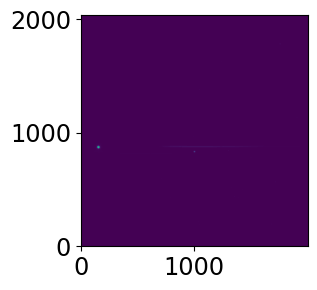

In [16]:
plt.imshow(spec.image.data,origin="lower")

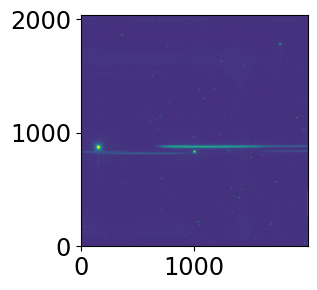

In [17]:
plt.imshow(spec.image.data-spec.image.data.min(),origin="lower",norm=LogNorm(vmin=1,vmax=1000))

# Generate info

In [18]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [19]:
df_infos.set_index('idx',inplace=True)

In [20]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [21]:
all_reftime=np.array(all_reftime)

In [22]:
df_infos["reftime"]=all_reftime

In [23]:
NN = len(df_infos)

In [24]:
df_infos

object                        date_obs   airmass  temperature  \
idx                                                                    
0    HD142331  2022-06-30T23:14:17.706494693Z  1.407330            0   
1    HD142331  2022-06-30T23:15:00.685003473Z  1.403795            0   
2    HD142331  2022-06-30T23:24:09.982509252Z  1.361241            0   
3    HD142331  2022-06-30T23:24:53.063496612Z  1.358098            0   
4    HD185975  2022-06-30T23:35:28.838492749Z  2.024822            0   
5    HD185975  2022-06-30T23:36:11.789506509Z  2.024353            0   
6    HD142331  2022-06-30T23:46:30.526009735Z  1.274707            0   
7    HD142331  2022-06-30T23:47:13.622997377Z  1.272288            0   
8    HD142331  2022-06-30T23:56:23.770497704Z  1.243106            0   
9    HD142331  2022-06-30T23:57:06.817506398Z  1.240955            0   
10   HD142331  2022-07-01T00:06:15.421501668Z  1.215102            0   
11   HD142331  2022-07-01T00:06:58.427991746Z  1.213193            0   
12   HD142331  2022-07-01T00:16:11.245999223Z  1.190122            0   
13   HD142331  2022-07-01T00:16:54.249000391Z  1.188435            0   
14   HD185975  2022-07-01T00:32:23.866509013Z  1.986588            0   
15   HD185975  2022-07-01T00:33:07.033496852Z  1.986114            0   
16   HD142331  2022-07-01T00:48:08.614007707Z  1.128739            0   

     pressure  humidity   reftime  
idx                                
0           0         0  0.000000  
1           0         0  0.011938  
2           0         0  0.164521  
3           0         0  0.176488  
4           0         0  0.353092  
5           0         0  0.365023  
6           0         0  0.536894  
7           0         0  0.548866  
8           0         0  0.701684  
9           0         0  0.713642  
10          0         0  0.866032  
11          0         0  0.877978  
12          0         0  1.031539  
13          0         0  1.043484  
14          0         0  1.301711  
15          0         0  1.313702  
16          0         0  1.564141

### Save info file

In [25]:
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}.csv"
df_infos.to_csv(summary_file)

## Main pickle file

In [26]:
#spec.image.target_pixcoords

In [27]:
header = spec.spectrum.header
header

SIMPLE  =                    T                                                  
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1146                                                  
NAXIS2  =                    3                                                  
EXTEND  =                    T                                                  
TARGET  = 'HD142331'           / name of the target in the image                
REDSHIFT= '-0.000236'          / redshift of the target                         
GRATING = 'holo4_003'          / name of the disperser                          
ROTANGLE=   0.1747416952135253 / [deg] angle of the dispersion axis             
D2CCD   =    180.0197087648065 / [mm] distance between disperser and CCD        
LSHIFT  =                  0.0                                                  
PARANGLE=    -143.7912780284

In [28]:


all_rebin=np.zeros(NN)
all_targetx=np.zeros(NN)
all_targety=np.zeros(NN)
all_rotangle=np.zeros(NN)
all_d2ccd=np.zeros(NN)
all_pixshift=np.zeros(NN)
all_chi2_fit=np.zeros(NN)
all_a2_fit=np.zeros(NN)
all_lbda_ref=np.zeros(NN)
all_tagnumber=np.zeros(NN)


for idx in range(NN):
    
   
    tagnum=str(all_num[idx])
    
    #ROTANGLE=  -0.1367006901184345 / [deg] angle of the dispersion axis             
    #D2CCD   =    179.6778868175837 / [mm] distance between disperser and CCD        
    #TARGETX =    315.9547462941386 / target position on X axis                      
    #TARGETY =    75.06785960446246 / target position on Y axis                      
    #LBDA_REF=    634.9155139280113                                                  
    #PIXSHIFT=  -0.9996981508176748                                                  
    #CHI2_FIT=    1.602115867259752                                                  
    #A2_FIT  =                  1.0                                                  
    #REBIN   =                    2 / original image rebinning factor to get spectrum
    
    rebin=header["REBIN"]
    targetx=header["TARGETX"]*rebin
    targety=header["TARGETY"]*rebin
    rotangle=header["ROTANGLE"]
    d2ccd=header["D2CCD"]
    pixshift=header["PIXSHIFT"]
    
    if header.get("CHI2_FIT") != None:
        chi2_fit=header["CHI2_FIT"]
    else:
        chi2_fit= -1
        
    if header.get("A2_FIT") != None:
        a2_fit=header["A2_FIT"]
    else:
        a2_fit=-1
    
    
    lbda_ref=header["LBDA_REF"]
    
    
    all_rebin[idx]=rebin
    all_targetx[idx]=targetx
    all_targety[idx]=targety
    all_rotangle[idx]=rotangle
    all_d2ccd[idx]=d2ccd
    all_pixshift[idx]=pixshift
    
    
    all_chi2_fit[idx]=chi2_fit
    all_a2_fit[idx]=a2_fit
    all_lbda_ref[idx]=lbda_ref
    all_tagnumber[idx]=tagnum
    



## Write pickle file

In [29]:
all_out_data = {}

for idx in range(NN):
    if FLAG_ORDER2:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'], 
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
               'all_lambdas_order2':all_lambdas_order2[idx],
               'all_fluxes_order2':all_data_order2[idx],
               'all_fluxes_err_order2':all_data_err_order2[idx],
              }
    else:
        thedata = {'number':all_tagnumber[idx],
               'object':df_infos.iloc[idx]['object'],
               'dateobs':df_infos.iloc[idx]['date_obs'],
               'refhour':df_infos.iloc[idx]['reftime'],
               'airmass':df_infos.iloc[idx]['airmass'],
               'pressure':df_infos.iloc[idx]['pressure'], 
               'temperature':df_infos.iloc[idx]['temperature'], 
               'humidity':df_infos.iloc[idx]['humidity'], 
               'targetx_pix':all_targetx[idx],
               'targety_pix':all_targety[idx],
               'rotangle':all_rotangle[idx],
               'd2ccd':all_d2ccd[idx],
               'all_lambdas':all_lambdas[idx],
               'all_fluxes':all_data[idx],
               'all_fluxes_err':all_data_err[idx],
            }         
            
    all_out_data[all_exposures[idx]]=thedata


In [30]:
#all_out_data

In [31]:
pkl_outfilename=f'run-auxtel-holo-{DATE}-{filterdispersername}-{configmode}.pickle'

In [32]:
with open(pkl_outfilename, 'wb') as pickle_file:
    pickle.dump(all_out_data,pickle_file)

In [33]:
pkl_infilename=pkl_outfilename

In [34]:
with open(pkl_infilename, 'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [35]:
# Get first value of dictionary
next(iter(content.items()))

(2022063000045,
 {'number': 45.0,
  'object': 'HD142331',
  'dateobs': '2022-06-30T23:14:17.706494693Z',
  'refhour': 0.0,
  'airmass': 1.4073300660079,
  'pressure': 0,
  'temperature': 0,
  'humidity': 0,
  'targetx_pix': 307.6065209792507,
  'targety_pix': 1744.737868427908,
  'rotangle': 0.17474169521352528,
  'd2ccd': 180.01970876480647,
  'all_lambdas': array([ 298.76399206,  299.47313454,  300.18226618, ..., 1096.03451359,
         1096.71519561, 1097.39583959]),
  'all_fluxes': array([-3.44323762e-15, -2.26592922e-15, -3.74088200e-15, ...,
          9.37967122e-16,  5.20286981e-16,  1.89262377e-15]),
  'all_fluxes_err': array([8.79337042e-16, 6.68327247e-16, 5.40441251e-16, ...,
         6.72325001e-16, 9.07299790e-16, 1.16438114e-15]),
  'all_lambdas_order2': array([ 298.88385581,  299.59299645,  300.30212625, ..., 1096.14954115,
         1096.8302167 , 1097.51085422]),
  'all_fluxes_order2': array([-15.74276605, -10.08238411, -16.24539964, ...,   0.10932519,
           0.0613